In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import edo
from edo.pdfs import Uniform

In [2]:
def anscombe(df):
    """ Determine the fitness of a two-column dataset
    to be its norm-summed difference from a general
    dataset with the following statistical attributes:

    mean(x) = 5, std(x) = 4.7
    mean(y) = 7, std(y) = 4.1
    corr(x, y) = 0.8

    where x, y are the columns of the dataset. """
    
    xm, ym = df.mean()
    xstd, ystd = df.std()
    corr = df.corr().iloc[0, 1]

    expected = [5, 7, 4.7, 4.1, 0.8]

    return sum(
        [
            abs(stat - exp) / exp
            for stat, exp in zip(
                (xm, ym, xstd, ystd, corr), expected
            )
        ]
    )

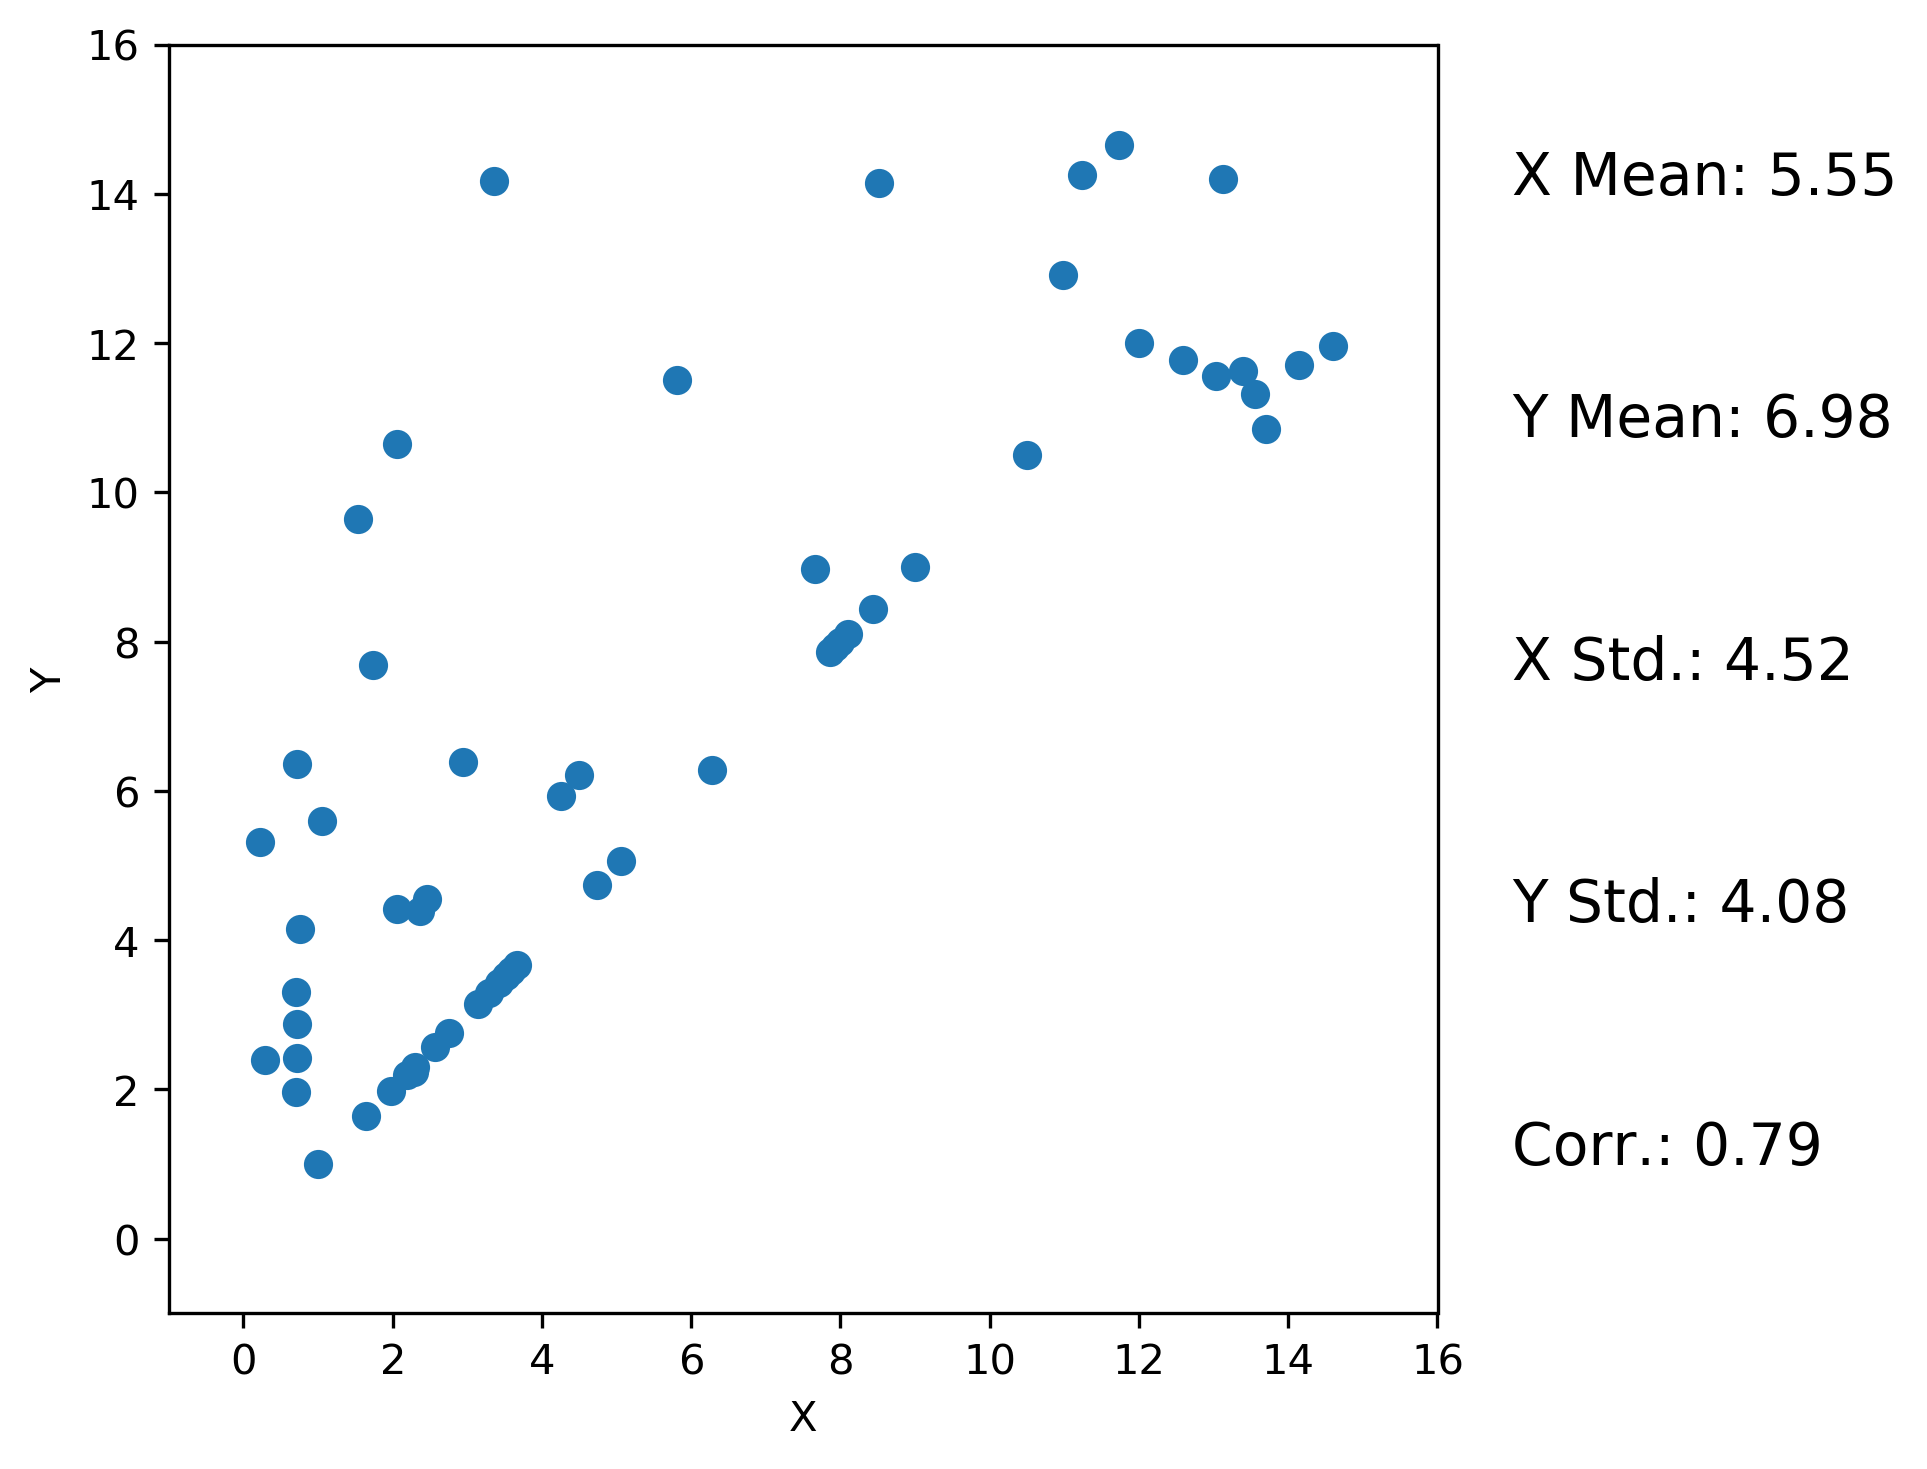

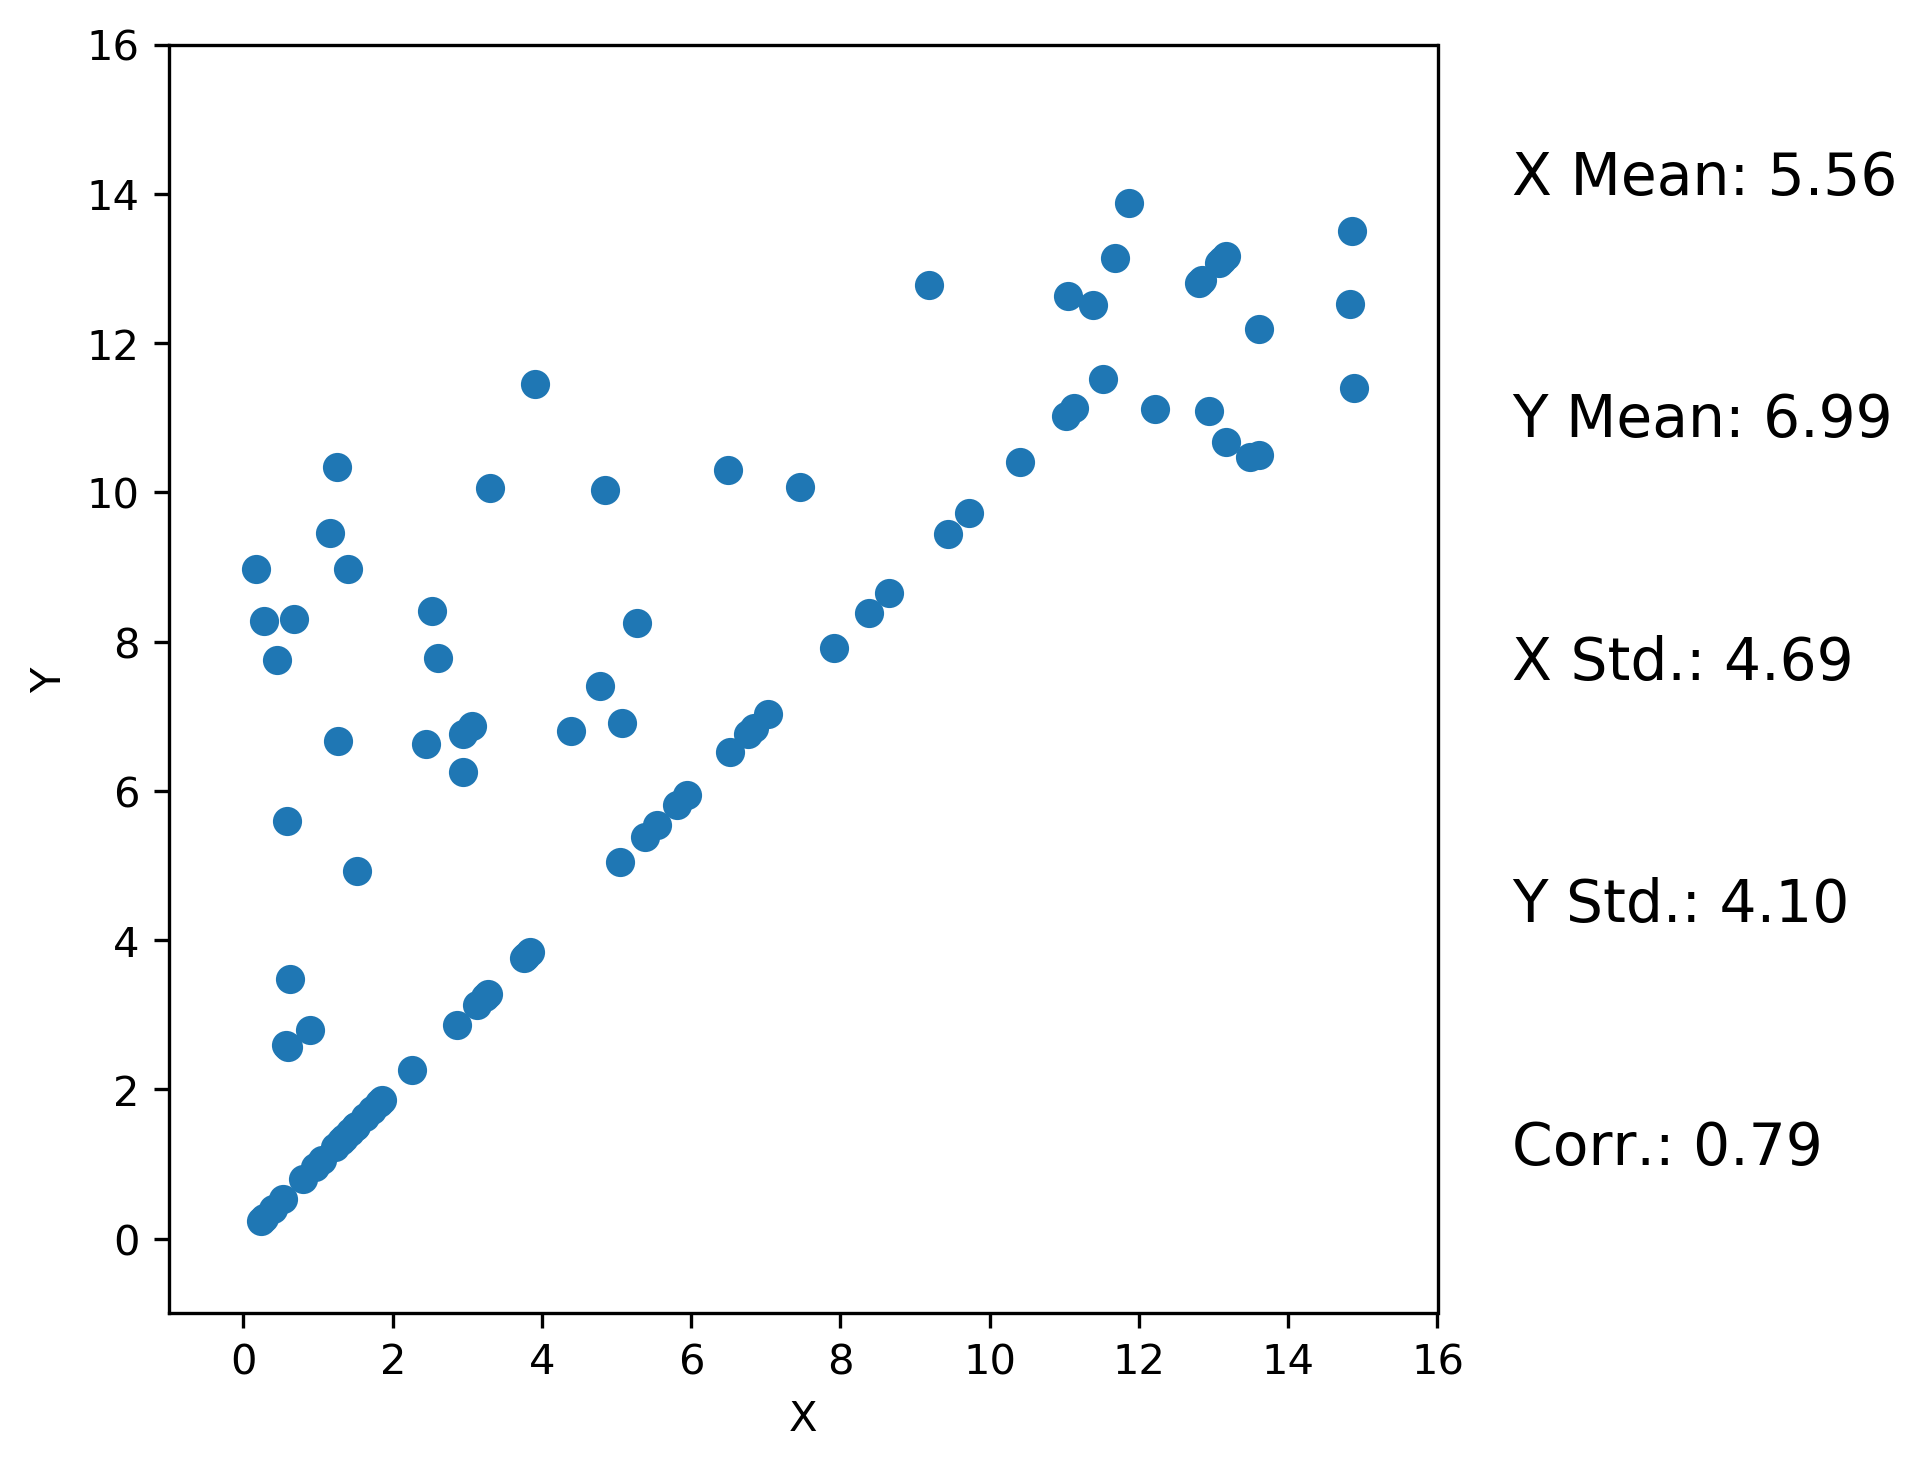

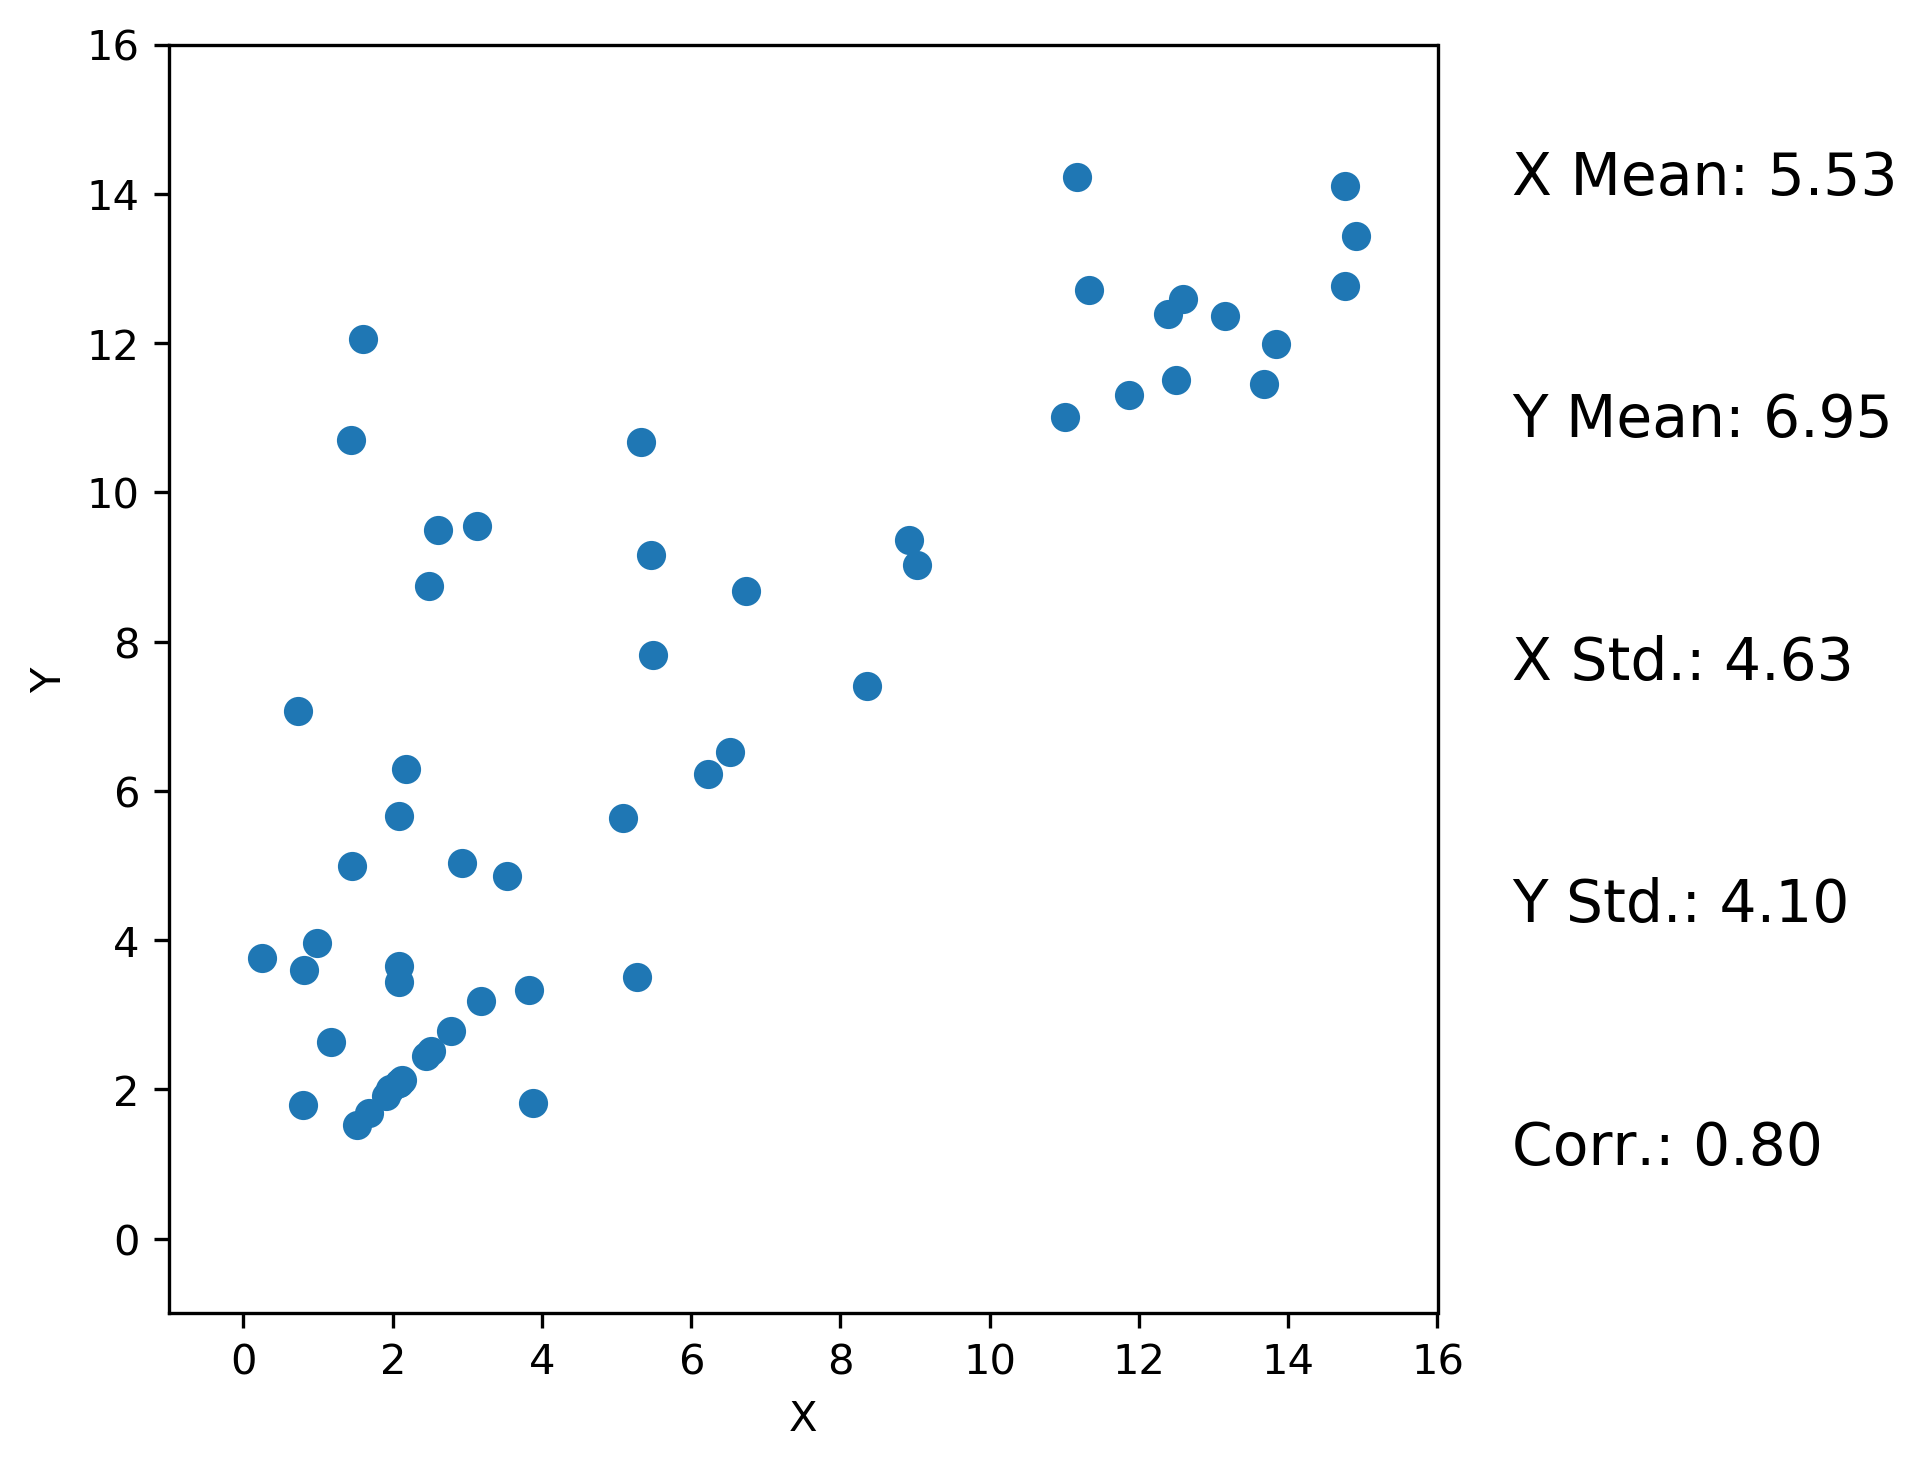

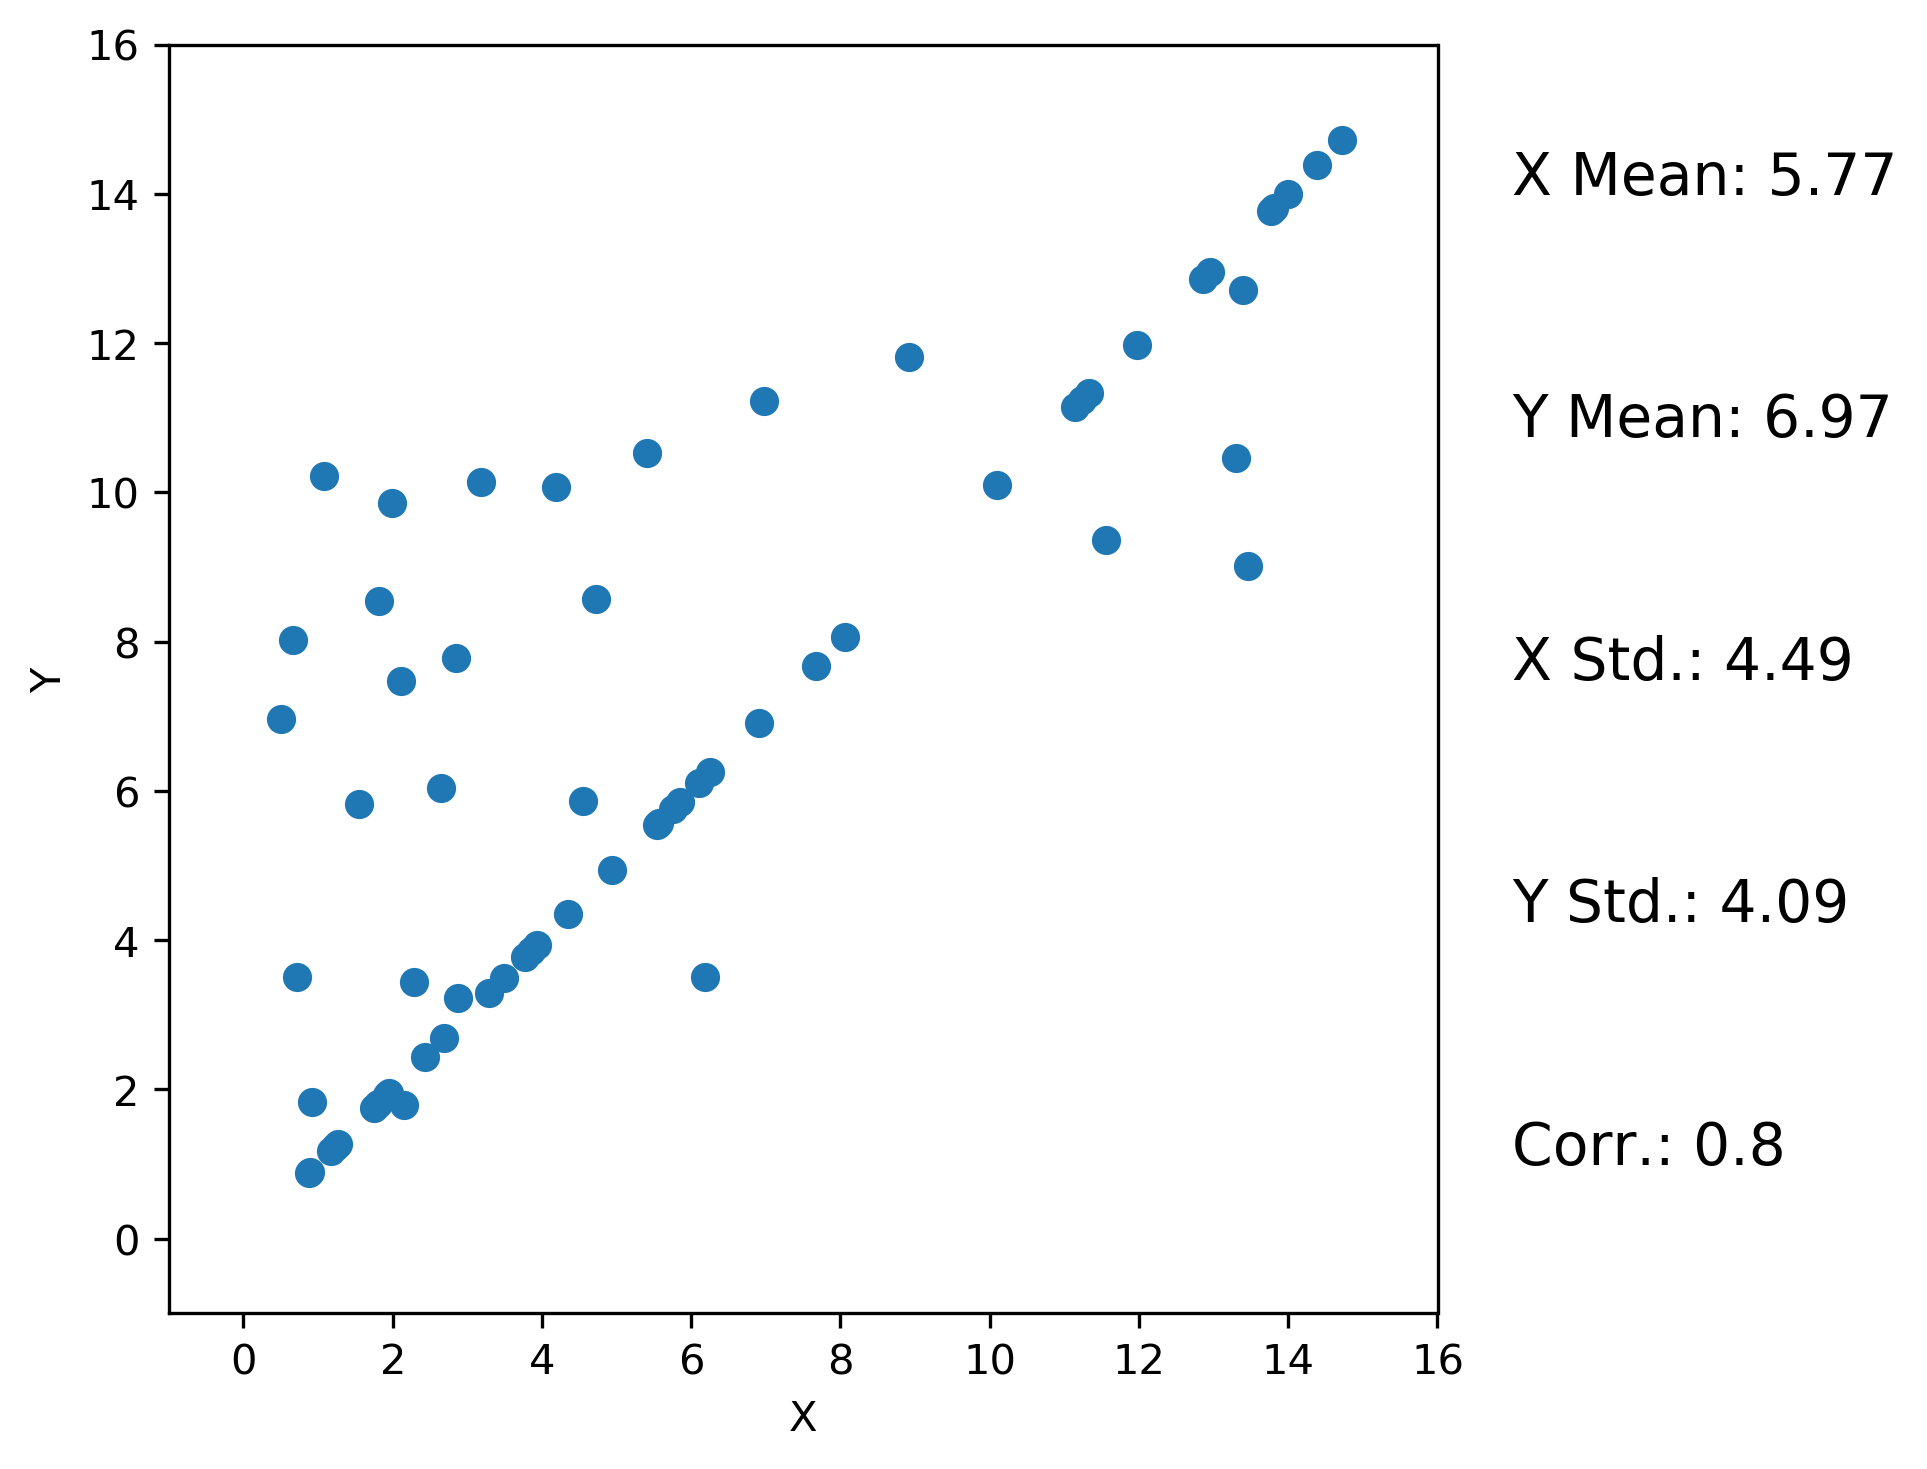

In [3]:
for seed in range(4):

    Uniform.param_limits["bounds"] = [0, 15]

    pop, fit, all_pops, all_fits = edo.run_algorithm(
        fitness=anscombe,
        size=250,
        row_limits=[50, 100],
        col_limits=[2, 2],
        pdfs=[Uniform],
        max_iter=100,
        best_prop=0.1,
        mutation_prob=0.005,
        seed=seed,
    )

    fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

    best = np.argmin(fit)
    df = pop[best].dataframe

    ax.scatter(df[0], df[1])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xlim(-1, 16)
    ax.set_ylim(-1, 16)
    ax.set_aspect("equal")

    positions = [14, 10.75, 7.5, 4.25, 1]
    labels = ["X Mean", "Y Mean", "X Std.", "Y Std.", "Corr."]
    results = *df.mean(), *df.std(), df.corr().iloc[0, 1]
    max_label_length = max([len(label) for label in labels])

    for pos, label, res in zip(positions, labels, results):
        ax.text(17, pos, (label + ": ").ljust(max_label_length) + f"{str(np.round(res, 9))[:-7]}", fontsize=14)

    plt.tight_layout()
    plt.savefig(f"best_{seed}.pdf", transparent=True)

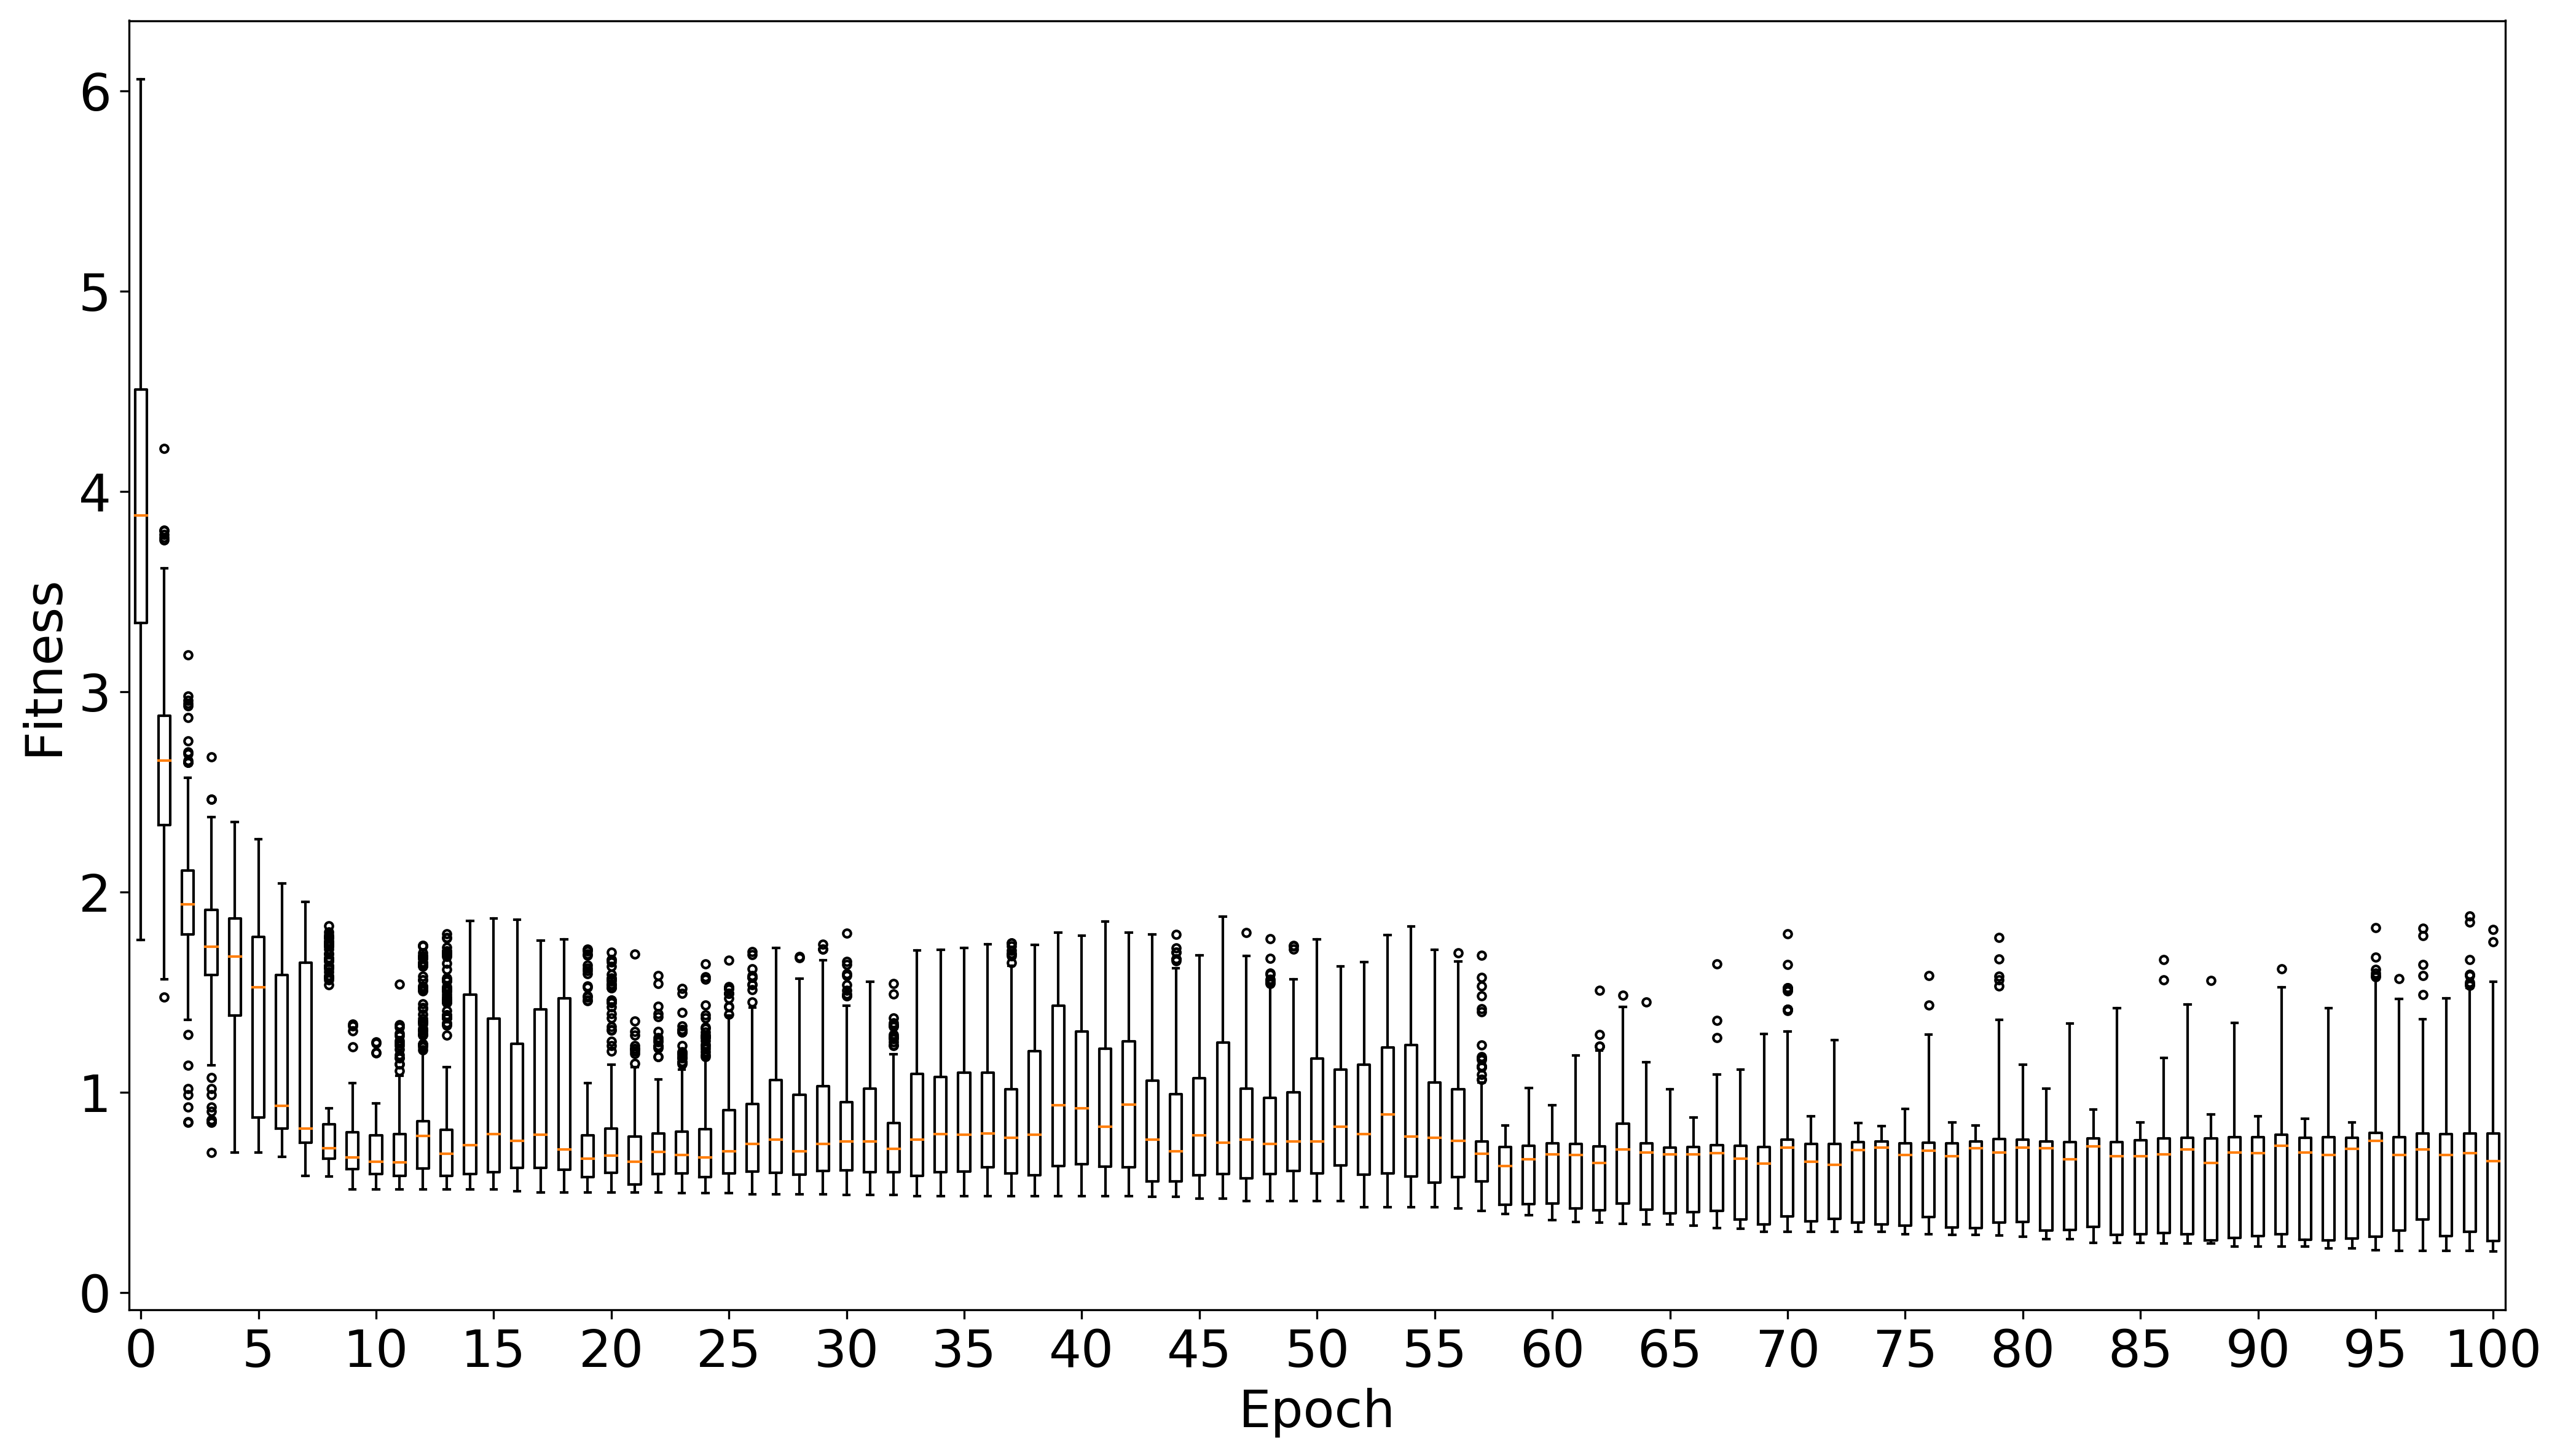

In [4]:
# Fitness progression
fig, ax = plt.subplots(1, figsize=(14, 8), dpi=300)
fs = 20

ax.boxplot(
    all_fits, positions=range(len(all_fits)), sym="."
)

ax.set_xlabel("Epoch", size=fs)
ax.set_ylabel(r"Fitness", size=fs)
ax.set_xticks(range(0, 101, 5))
ax.set_xticklabels(range(0, 101, 5))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(fs)

plt.tight_layout()
plt.savefig("fitness.pdf", transparent=True)